
# Project: Investigating movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that has been selected for the purpose of this analysis is the movie dataset. The movie dataset includes name of the movie, genres, budget of the movie, revenue collected and others. This analysis will try to answer 3 questions posed below:
> 1. Which genres of the movies are the most popular from year to year?
> 2. What kinds of properties are associated with movies that have high revenues?
> 3. Which movies have made the most money?

In [334]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [335]:
#Loading the csv file and understanding the datasets
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [336]:
#Check the no. of samples and column in the dataset
df.shape

(10866, 21)

In [337]:
#Checking datatypes.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [338]:
#Investigating release_date
#The data type appears to be in string
df['release_date'].head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [339]:
#Investigating budget_adj
#The number appears in a scientific format
df['budget_adj'].head()

0    1.379999e+08
1    1.379999e+08
2    1.012000e+08
3    1.839999e+08
4    1.747999e+08
Name: budget_adj, dtype: float64

In [340]:
#Investigating revenue_adj
#The number appears in a scientific format
df['revenue_adj'].head()

0    1.392446e+09
1    3.481613e+08
2    2.716190e+08
3    1.902723e+09
4    1.385749e+09
Name: revenue_adj, dtype: float64

In [341]:
#Investigating original_title
df['original_title'].head()

0                  Jurassic World
1              Mad Max: Fury Road
2                       Insurgent
3    Star Wars: The Force Awakens
4                       Furious 7
Name: original_title, dtype: object

In [342]:
#Checking for null values. 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [343]:
#Check the dataset where 'genres'is null to see if the datasets share some similarities.
#Columns id, imdb_id, cast, homepage, director, tagline, keywords, overview, production companies will be removed 
#   as they will not be used for answering the questions posed.

df[df.genres.isnull()]
#After checking the subset, the null seems random.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [344]:
#Check for duplicates
df.duplicated().sum()

1

In [345]:
#Checking the descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [346]:
#Checking the movie which made the most money from 1960 to 2015
df[df['revenue_adj'] >= df['revenue_adj'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


#### Comments on the above descriptive stats
> From the above table, it can be seen that the lowest/min of the runtime, budget_adj and revenue_adj is 0. This needs to be taken care of as it may affect the analysis which will be done in the data cleaning part. Some of the interesting things from the descriptive stats are:-
> 1. The most popular movies have ratings of 32.98 whereas 75% of the movies have rating below 0.8.
> 2. The dataset includes movies from the year 1960 to 2015.
> 3. The movie that made the most money earned 2.8bn dollars.


### Data Cleaning
> In this section, I have included all the steps to clean the data. First of all, all the columns that do not help to answer the questions posed will be dropped. Secondly, correct datatypes will be assigned to the columns with the wrong datatypes. Finally, all the duplicated rows will be dropped.

In [347]:
#drop columns that will not be used for answering the questions posed 
#  (imdb_id,id, budget,revenue,cast,homepage,keywords,overview,tagline)
df.drop(columns=['imdb_id','id','budget', 'revenue','cast', 'homepage', 'keywords','overview','tagline', 'production_companies'],inplace = True)

In [348]:
#Checking if the columns have been successfully dropped off
df.head(3)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [349]:
#Changing the datatypes of 'budget_adj' and 'revenue_adj' from float to int.
df[['budget_adj','revenue_adj']] = df[['budget_adj','revenue_adj']].astype(int)

In [350]:
#Converting the release date into date format
pd.to_datetime(df.release_date)

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

In [351]:
#Checking if the datatype has been successfully converted.
df[['budget_adj','revenue_adj','release_date']].dtypes

budget_adj       int64
revenue_adj      int64
release_date    object
dtype: object

In [352]:
#Check if the formats have been correctly applied
df[['budget_adj','revenue_adj']].head(3)

,budget_adj,revenue_adj
0,137999939,1392445892
1,137999939,348161292
2,101199955,271619025


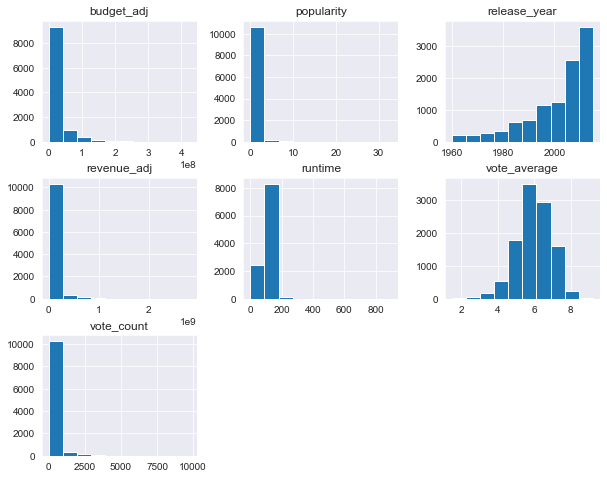

In [353]:
#Before dropping any datasets that contain null and duplicate values; checking the distribution.
#This will also be handy to understand if dropping the null and duplicate rows impact the distribution.
df.hist(figsize = (10, 8));

#### Comments on the above histogram
> From the histogram above, it can be seen that there are more movies that were released in the later years. Since, our research questions does not need any comparison (old release movies and newer released movies), this will not be impact the analysis.

In [354]:
#Dropping rows where 'genres' and 'director'is null
df.dropna(inplace=True)

In [355]:
#Checking to make sure that all null values have been removed
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [356]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

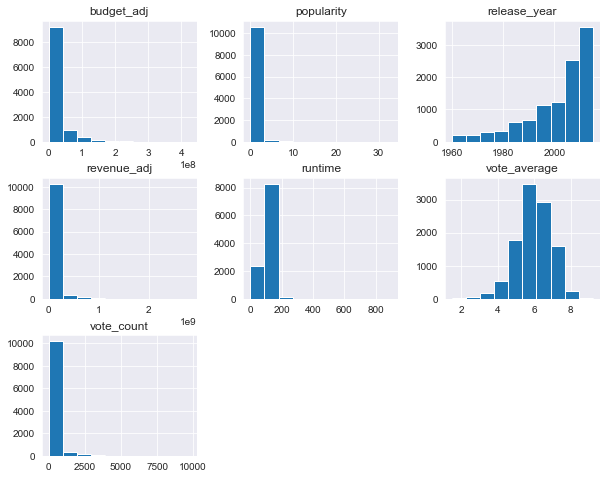

In [357]:
#Checking the distribution after dropping the null and duplicate rows.
#After checking the distribution, there aren't much changes to it.
df.hist(figsize = (10, 8));

#### Comments on the above descriptive stats
> After dropping the duplicates and nulls, the distribution of data compared to previous one is similar.

In [358]:
#The descriptive stats shows that the min value of runtime, budget_adj and revenue_adj is 0
#Investigating deeper into the data
daf = df.query('runtime != 0 & budget_adj != 0 & revenue_adj != 0')

In [359]:
#Checking the count of the rows with values runtime, budget_adj and revenue_adj
df.query('runtime == 0 & budget_adj == 0 & revenue_adj == 0').count().revenue_adj

25

In [360]:
#Re-checking the descriptive statistics to see if the outliers still exist
daf.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.00000,3.852000e+03,3.852000e+03
mean,1.191999,109.213915,527.977155,6.168484,2001.25675,4.426186e+07,1.371330e+08
std,1.475410,19.913092,880.112904,0.794981,11.28389,4.481058e+07,2.161466e+08
min,0.001117,15.000000,10.000000,2.200000,1960.00000,1.000000e+00,2.000000e+00
25%,0.462529,95.000000,71.000000,5.700000,1995.00000,1.309053e+07,1.840847e+07
50%,0.797913,106.000000,204.000000,6.200000,2004.00000,3.002841e+07,6.175513e+07
75%,1.369877,119.000000,580.250000,6.700000,2010.00000,6.065160e+07,1.633093e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.00000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres of the movies are the most popular from year to year?

In [361]:
#Shape of the dataset
daf.shape

(3852, 11)

In [362]:
#Finding the unique count of genres
daf[['genres']].nunique()

genres    1053
dtype: int64

In [363]:
#Generating unique values in the genres.
daf['genres'].value_counts()

Drama                                        245
Comedy                                       233
Drama|Romance                                107
Comedy|Romance                               103
Comedy|Drama|Romance                          91
                                            ... 
Horror|Crime|Mystery|Thriller                  1
Fantasy|Drama|Horror|Thriller                  1
Adventure|Drama|History|War                    1
Science Fiction|Action|Thriller|Adventure      1
Action|Comedy|Drama|War                        1
Name: genres, Length: 1053, dtype: int64

In [364]:
#Unique values in the genres for the bottom 20
daf['genres'].value_counts().tail(20)

Adventure|Animation|Crime|Family|Fantasy     1
Family|Animation|Drama                       1
Action|Science Fiction|Thriller|Western      1
Action|Adventure|Crime|Drama|Romance         1
Adventure|Fantasy|Action|Romance             1
Drama|Action|Thriller|Crime|War              1
Family|Comedy|Fantasy                        1
Adventure|Comedy|Fantasy|Family              1
Drama|Action|Romance                         1
Mystery|Drama|Thriller                       1
Action|Thriller|Music                        1
Drama|Adventure|Western                      1
Mystery|Science Fiction                      1
Drama|Western|Crime                          1
Mystery|Adventure|Comedy                     1
Horror|Crime|Mystery|Thriller                1
Fantasy|Drama|Horror|Thriller                1
Adventure|Drama|History|War                  1
Science Fiction|Action|Thriller|Adventure    1
Action|Comedy|Drama|War                      1
Name: genres, dtype: int64

In [365]:
#Unique values in the genres for the top 20
daf['genres'].value_counts().head(20)

Drama                          245
Comedy                         233
Drama|Romance                  107
Comedy|Romance                 103
Comedy|Drama|Romance            91
Comedy|Drama                    88
Horror|Thriller                 81
Horror                          58
Drama|Thriller                  48
Action|Thriller                 39
Crime|Drama|Thriller            37
Drama|Comedy                    36
Comedy|Family                   32
Action|Crime|Thriller           31
Drama|History                   28
Drama|Crime                     27
Crime|Drama                     26
Thriller                        25
Drama|Comedy|Romance            25
Action|Crime|Drama|Thriller     25
Name: genres, dtype: int64

In [366]:
#Looking into the release_year data
daf['release_year'].value_counts().head(55)

2011    198
2013    180
2010    178
2009    174
2006    169
2008    166
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
Name: release_year, dtype: int64

In [367]:
#Create a dataframe that includes only the top 1 genres for each year as there are more than 2031 unique 
#   genres and this can make the visualisation look crowded
df_popular = daf.loc[daf.groupby('release_year')['popularity'].idxmax()]
df_popular

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10141,2.610362,Psycho,Alfred Hitchcock,109,Drama|Horror|Thriller,8/14/60,1180,8.0,1960,5949601,235934958
10110,2.631987,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,29179444,1574814739
9849,3.170651,Dr. No,Terence Young,110,Adventure|Action|Thriller,10/4/62,560,6.7,1962,7929293,429623553
10438,2.508235,From Russia With Love,Terence Young,115,Action|Thriller|Adventure,10/11/63,458,6.7,1963,17800448,561773358
9881,3.153791,Goldfinger,Guy Hamilton,110,Adventure|Action|Thriller,9/17/64,602,7.0,1964,24605935,878080399
10689,1.910465,Thunderball,Terence Young,130,Adventure|Action|Thriller,12/16/65,331,6.3,1965,76126200,977153544
10822,0.670274,Who's Afraid of Virginia Woolf?,Mike Nichols,131,Drama,6/21/66,74,7.5,1966,50385110,226643572
10398,2.550704,The Jungle Book,Wolfgang Reitherman,78,Family|Animation|Adventure,10/18/67,928,7.0,1967,26147054,1345551058
9719,3.309196,2001: A Space Odyssey,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,4/5/68,1708,7.7,1968,75227563,355546597
10724,1.778746,On Her Majesty's Secret Service,Peter R. Hunt,142,Adventure|Action|Thriller,12/12/69,258,6.4,1969,41609849,487278044


In [368]:
#Filtering to show only the release year and the popular genres
df_popular[['release_year', 'genres', 'original_title']]

,release_year,genres,original_title
10141,1960,Drama|Horror|Thriller,Psycho
10110,1961,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians
9849,1962,Adventure|Action|Thriller,Dr. No
10438,1963,Action|Thriller|Adventure,From Russia With Love
9881,1964,Adventure|Action|Thriller,Goldfinger
10689,1965,Adventure|Action|Thriller,Thunderball
10822,1966,Drama,Who's Afraid of Virginia Woolf?
10398,1967,Family|Animation|Adventure,The Jungle Book
9719,1968,Science Fiction|Mystery|Adventure,2001: A Space Odyssey
10724,1969,Adventure|Action|Thriller,On Her Majesty's Secret Service


Text(0.5, 1.0, 'Popularity Of The Most Popular Movies Over The Years')

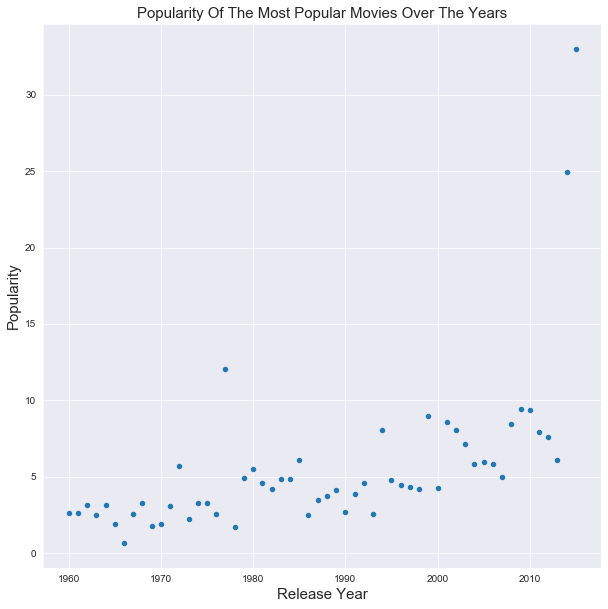

In [369]:
#I would also like to check irrespective of the genres, the popularity trends over the years
df_popular.plot(x='release_year',y='popularity',kind='scatter', figsize=(10,10));
plt.ylabel('Popularity', fontsize=15);
plt.xlabel('Release Year', fontsize=15);
plt.title('Popularity Of The Most Popular Movies Over The Years', fontsize=15)

#### Conclusion for Research Question 1
> The most popular genres over the years are diverse. Since movies can fit into more than one genre, this is also the reason why there is no conclusive answer to the first research question. As for the popularity of the movies, movies release latest on 2014 and 2015 have the highest poularity rating. Perhaps, this could be the reason of more accessible cinemas and/or internet streaming.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [370]:
# First, I need to define what high revenue means here
# Any revenues that are higher than the mean adjusted revenue will be considered as high revenues
df_mean = daf.revenue_adj.mean()
df_mean

137132962.77258566

In [371]:
#Creating a new dataframe to filter all the rows that have revenue_adj more than the mean
df_highrev = daf[daf['revenue_adj'] >= df_mean]
df_highrev

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939,348161292
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955,271619025
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923,1385748801
...,...,...,...,...,...,...,...,...,...,...,...
10758,1.210324,Superman,Richard Donner,143,Adventure|Fantasy|Action|Science Fiction,12/14/78,518,6.7,1978,183848538,1003538977
10759,1.198849,Halloween,John Carpenter,91,Horror|Thriller,10/25/78,522,7.3,1978,1002810,233989048
10760,1.157930,Animal House,John Landis,109,Comedy,7/27/78,230,6.7,1978,9025291,471320797
10762,0.959754,The Deer Hunter,Michael Cimino,183,Drama|War,12/8/78,464,7.4,1978,50140510,167135034


In [372]:
#Exploring properties for movies with adjusted revenues higher than the mean adjusted revenue
df_highrev.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1.120000e+03
mean,2.129715,116.553571,1195.613393,6.431875,1999.778571,8.222410e+07,3.673382e+08
std,2.210622,22.404255,1293.406735,0.718921,12.434676,5.510256e+07,2.872929e+08
min,0.131526,69.000000,13.000000,4.100000,1960.000000,2.240000e+02,1.375112e+08
25%,1.011166,100.000000,332.000000,5.900000,1994.000000,3.914732e+07,1.860528e+08
50%,1.580763,114.000000,725.500000,6.400000,2003.000000,7.270485e+07,2.680396e+08
75%,2.521477,129.000000,1592.750000,7.000000,2010.000000,1.139663e+08,4.371547e+08
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


#### Conclusion for Research Question 2
> The following are some conclusions from research question 2.
> 1. The minimum revenue for the movies in the higher that average bracket is 1.3bn dollars.This does not mean that they were profitable.
> 2. The minimum budget for these higher revenue generating movies is 2.24bn dollars.
> 3. The average run time of these movies is 114 mins which is around 2hrs.

### Research Question 3: What movies have made the most money?

In [373]:
#Continuing from the second research question, I will identify the top 10 movies that have made the most money
#   interms of adjusted revenue and net profit
#Top 10 movies by highest revenue
df_movies = df_highrev.sort_values(by=['revenue_adj'], ascending=False).head(10)
df_movies

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,240886902,2827123750
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,39575591,2789712242
5231,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,271692064,2506405735
10594,2.010733,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,39289276,2167324901
9806,2.563191,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,28362748,1907005841
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129
8889,2.900556,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,23726245,1791694309
8094,1.136610,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,31481271,1583049536
10110,2.631987,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,29179444,1574814739
4361,7.637767,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,208943741,1443191435


In [374]:
#Exploring the attributes of the Top 10 movies by highest revenue
df_movies[['release_year', 'director','original_title', 'genres','revenue_adj']]

,release_year,director,original_title,genres,revenue_adj
1386,2009,James Cameron,Avatar,Action|Adventure|Fantasy|Science Fiction,2827123750
1329,1977,George Lucas,Star Wars,Adventure|Action|Science Fiction,2789712242
5231,1997,James Cameron,Titanic,Drama|Romance|Thriller,2506405735
10594,1973,William Friedkin,The Exorcist,Drama|Horror|Thriller,2167324901
9806,1975,Steven Spielberg,Jaws,Horror|Thriller|Adventure,1907005841
3,2015,J.J. Abrams,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1902723129
8889,1982,Steven Spielberg,E.T. the Extra-Terrestrial,Science Fiction|Adventure|Family|Fantasy,1791694309
8094,1995,Irwin Winkler,The Net,Crime|Drama|Mystery|Thriller|Action,1583049536
10110,1961,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,1574814739
4361,2012,Joss Whedon,The Avengers,Science Fiction|Action|Adventure,1443191435


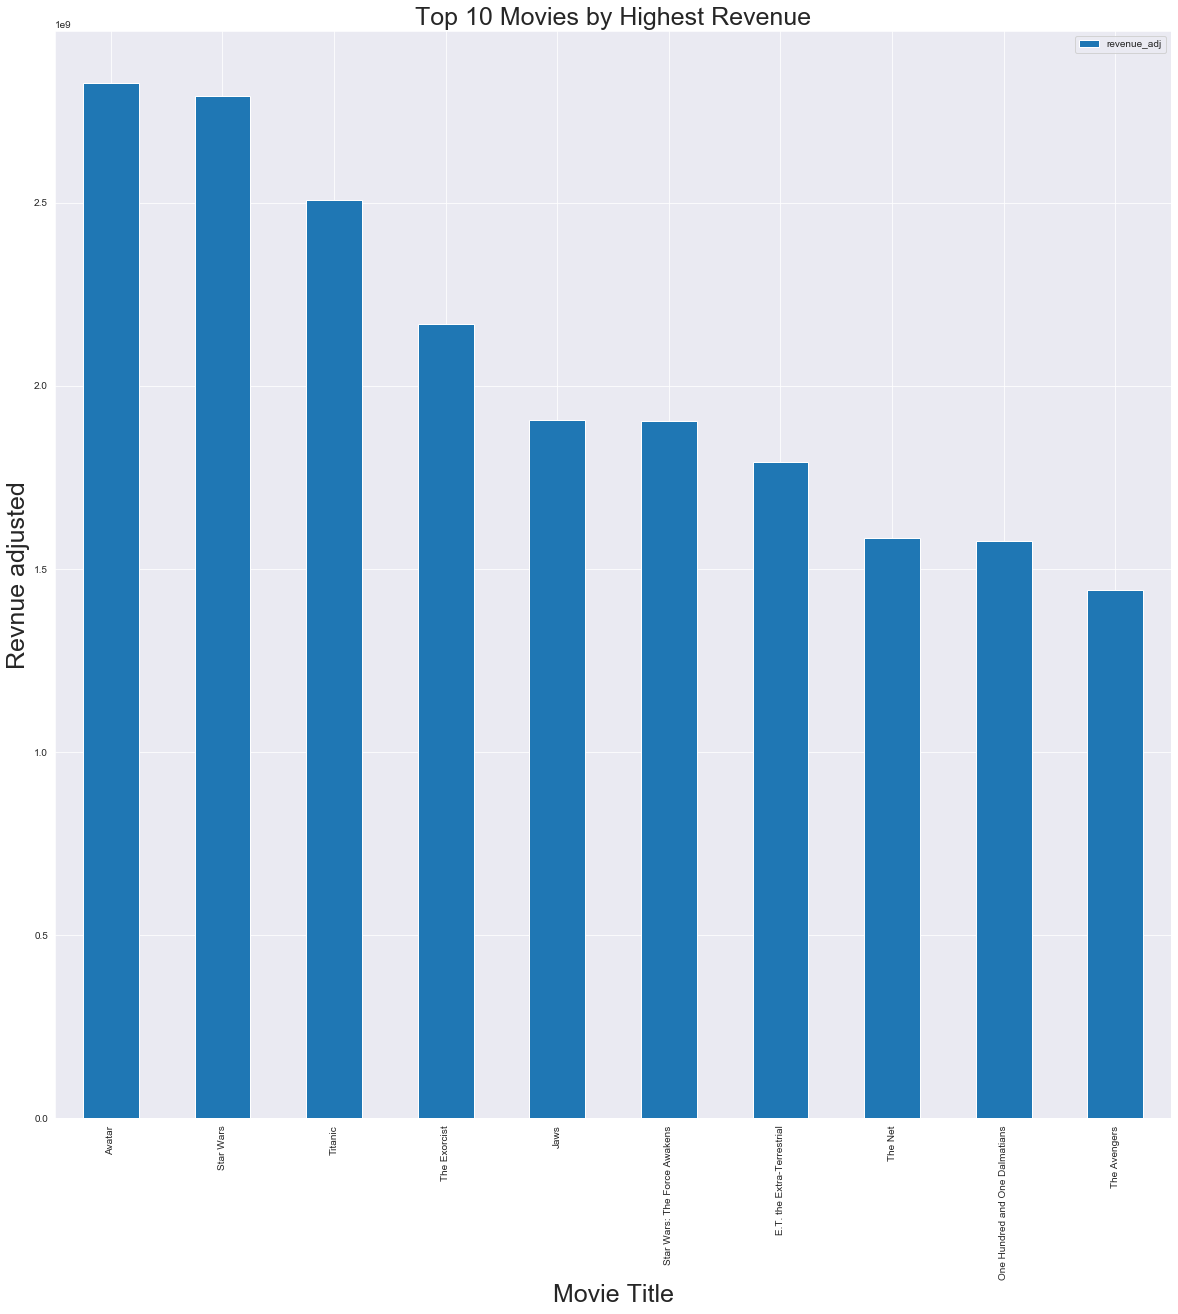

In [375]:
#Visualising the Top 10 movies by highest revenue
df_movies.plot(x='original_title',y='revenue_adj',kind='bar', figsize=(20,20));
plt.ylabel('Revnue adjusted', fontsize=25);
plt.xlabel('Movie Title', fontsize=25);
plt.title('Top 10 Movies by Highest Revenue', fontsize=25);

In [376]:
#Top 10 movies by highest net profit
#Calculating net profit
net_profit = df['revenue_adj'] - df['budget_adj']
net_profit

0        1254445953
1         210161353
2         170419070
3        1718723210
4        1210948878
            ...    
10861             0
10862             0
10863             0
10864             0
10865       -127642
Length: 10800, dtype: int64

In [377]:
#Assigning a new column 'net_profit' to the df dataframe
df['net_profit'] = net_profit 

In [378]:
#Checking if the new column has been created
df.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892,1254445953


In [379]:
#Top 10 movies by net profit
df_netprofit = df.sort_values(by=['net_profit'], ascending=False).head(20)
df_netprofit

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
1329,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,39575591,2789712242,2750136651
1386,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,240886902,2827123750,2586236848
5231,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,271692064,2506405735,2234713671
10594,2.010733,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,39289276,2167324901,2128035625
9806,2.563191,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,28362748,1907005841,1878643093
8889,2.900556,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,23726245,1791694309,1767968064
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919,1902723129,1718723210
8094,1.136610,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,31481271,1583049536,1551568265
10110,2.631987,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,29179444,1574814739,1545635295
7309,5.488441,The Empire Strikes Back,Irvin Kershner,124,Adventure|Action|Science Fiction,1/1/80,3954,8.0,1980,47628661,1424626187,1376997526


Text(0.5, 1.0, 'Top 10 Movies by Net Profit')

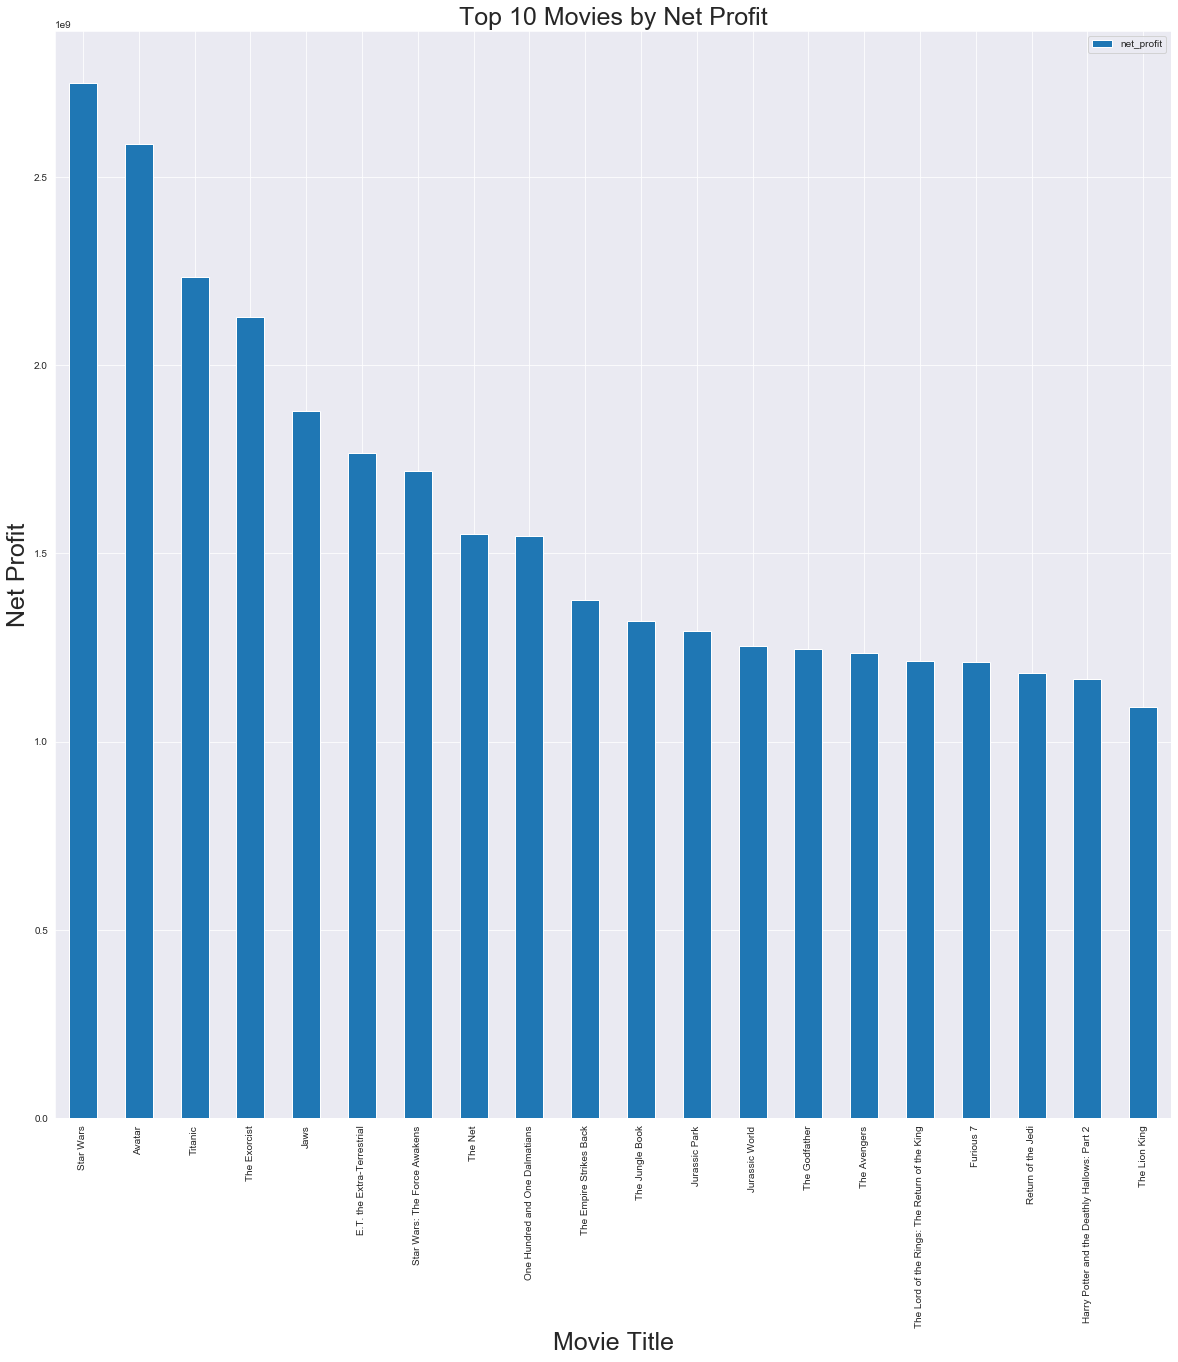

In [380]:
#Visualising the Top 10 movies by net profit
df_netprofit.plot(x='original_title',y='net_profit',kind='bar', figsize=(20,20));
plt.ylabel('Net Profit', fontsize=25);
plt.xlabel('Movie Title', fontsize=25);
plt.title('Top 10 Movies by Net Profit', fontsize=25)

In [381]:
#Exploring the attributes of the Top 10 movies by net profit
df_netprofit[['release_year', 'director','original_title', 'genres','net_profit']]

,release_year,director,original_title,genres,net_profit
1329,1977,George Lucas,Star Wars,Adventure|Action|Science Fiction,2750136651
1386,2009,James Cameron,Avatar,Action|Adventure|Fantasy|Science Fiction,2586236848
5231,1997,James Cameron,Titanic,Drama|Romance|Thriller,2234713671
10594,1973,William Friedkin,The Exorcist,Drama|Horror|Thriller,2128035625
9806,1975,Steven Spielberg,Jaws,Horror|Thriller|Adventure,1878643093
8889,1982,Steven Spielberg,E.T. the Extra-Terrestrial,Science Fiction|Adventure|Family|Fantasy,1767968064
3,2015,J.J. Abrams,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1718723210
8094,1995,Irwin Winkler,The Net,Crime|Drama|Mystery|Thriller|Action,1551568265
10110,1961,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,1545635295
7309,1980,Irvin Kershner,The Empire Strikes Back,Adventure|Action|Science Fiction,1376997526


#### Conclusion for Research Question 3
> The conclusions from the research question 3 are as follows:-
> 1. The top movies by highest revenue and by net profit are not the same.
> 2. The top movies by highest revenue is Avatar and the top movies by highest net profit is Star Wars.

<a id='limitations'></a>
## Limitations

> The analysis was done on a dataset that was filtered to include non-null, non-duplicate and non-zero values from the original dataset. Therefore, the conclusions may have been different if the datasets were complete. Furthermore, the data repository does not state the methodology of the collection of the data. This also questions the quality of the data.

<a id='conclusions'></a>
## Conclusions

> The conclusion for the analysis for each question has been outlined below.
> 1. Which genres of the movies are the most popular from year to year?
>    There isn't any particular genres that has consistently been the most popular from year to year. However, genres such as adventure and science fiction are the most popular in the recent years.
> 2. What kinds of properties are associated with movies that have high revenues?
>    The highest revenue generating movies were released around 2009. Although those movies have higher budget than others, the revenue earned by the movies do not follow the same case. Infact, movies with lower budget could potentially earn higher than movies with higher budget spent. 
> 3. Which movies have made the most money?
> The top 10 movies list by revenue and by net revenue (revenue - budget) are inconsistent. This shows that although these movies may have higher revenues, the net revenue may not follow the same suit.

## Reference

> 1. [Stackoverflow: sort_values()](https://stackoverflow.com/questions/47462690/how-to-get-top-5-values-from-pandas-dataframe)
> 2. [Stackoverflow: get rows with largest values after a groupby()](https://stackoverflow.com/questions/50815893/get-rows-with-largest-value-in-grouping)
